# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_fscore_support 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [107]:
df = pd.read_csv("client.csv", index_col=0)
df.head()

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
0,21.0,0.0,0.0,0.0,не работает,пенсионер,10000.0,63596287.0,0.0,1,0.0
1,21.0,0.0,0.0,0.0,не работает,пенсионер,10000.0,64345856.0,0.0,1,0.0
2,21.0,0.0,0.0,0.0,не работает,пенсионер,12000.0,62941277.0,0.0,2,1.0
3,21.0,0.0,0.0,0.0,не работает,пенсионер,12000.0,64374643.0,0.0,1,1.0
4,21.0,0.0,0.0,0.0,не работает,пенсионер,25000.0,64420984.0,0.0,1,0.0


In [3]:
df.target.value_counts()

target
0.0    13411
1.0     1812
Name: count, dtype: int64

In [4]:
df.socstatus_work_fl.value_counts()

socstatus_work_fl
не работает    13847
работает        1376
Name: count, dtype: int64

In [5]:
df.socstatus_pens_fl.value_counts()

socstatus_pens_fl
пенсионер       13176
не пенсионер     2047
Name: count, dtype: int64

In [6]:
df.columns

Index(['age', 'gender', 'child_total', 'dependants', 'socstatus_work_fl',
       'socstatus_pens_fl', 'personal_income', 'agreement_rk', 'target',
       'loan_num_total', 'loan_num_closed'],
      dtype='object')

In [108]:
num_columns = [
    'age',
    'gender',
    'child_total',
    'dependants',
    'personal_income',
    'agreement_rk',
    'target',
    'loan_num_total',
    'loan_num_closed',
]

In [109]:
df[num_columns] = df[num_columns].astype('int64')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                15223 non-null  int64 
 1   gender             15223 non-null  int64 
 2   child_total        15223 non-null  int64 
 3   dependants         15223 non-null  int64 
 4   socstatus_work_fl  15223 non-null  object
 5   socstatus_pens_fl  15223 non-null  object
 6   personal_income    15223 non-null  int64 
 7   agreement_rk       15223 non-null  int64 
 8   target             15223 non-null  int64 
 9   loan_num_total     15223 non-null  int64 
 10  loan_num_closed    15223 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.4+ MB


In [98]:
new_df = df[
    (df['socstatus_pens_fl']  == 'пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] < 65) & (df['gender'] == 1)
]

new_df

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
6,21,1,0,0,не работает,пенсионер,8000,74660511,0,1,1
7,21,1,0,0,не работает,пенсионер,10000,66768278,1,1,1
8,21,1,0,0,не работает,пенсионер,12000,66197247,0,1,0
9,21,1,0,0,не работает,пенсионер,14000,75204709,1,1,0
10,21,1,0,0,не работает,пенсионер,35000,75069712,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15109,64,1,1,0,не работает,пенсионер,13000,61293307,0,1,0
15110,64,1,1,0,не работает,пенсионер,13000,73818569,0,1,0
15111,64,1,1,0,не работает,пенсионер,15000,62770775,0,1,0
15129,64,1,2,0,не работает,пенсионер,9000,66705231,0,1,1


In [110]:
df.loc[
    (df['socstatus_pens_fl']  == 'пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] < 65) & 
    (df['gender'] == 1), 'socstatus_pens_fl'
] = 'не пенсионер'
df.loc[
    (df['socstatus_pens_fl']  == 'пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] < 60) & 
    (df['gender'] == 0), 'socstatus_pens_fl'
] = 'не пенсионер'
df

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
0,21,0,0,0,не работает,не пенсионер,10000,63596287,0,1,0
1,21,0,0,0,не работает,не пенсионер,10000,64345856,0,1,0
2,21,0,0,0,не работает,не пенсионер,12000,62941277,0,2,1
3,21,0,0,0,не работает,не пенсионер,12000,64374643,0,1,1
4,21,0,0,0,не работает,не пенсионер,25000,64420984,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,66,1,1,0,не работает,не пенсионер,9300,59929855,0,1,1
15219,66,1,1,0,работает,не пенсионер,8000,62095178,0,1,0
15220,66,1,2,0,не работает,не пенсионер,12000,61040426,0,1,1
15221,66,1,3,0,не работает,не пенсионер,17404,60444898,0,1,0


In [100]:
new_df = df[
    (df['socstatus_pens_fl']  == 'не пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] >= 65) & (df['gender'] == 1)
]

new_df

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
15166,65,1,0,0,не работает,не пенсионер,9000,61962340,0,1,0
15167,65,1,0,0,не работает,не пенсионер,11000,73829630,0,1,0
15168,65,1,0,0,не работает,не пенсионер,17000,75215749,0,2,1
15188,65,1,1,0,не работает,не пенсионер,13000,74946033,1,2,1
15204,65,1,3,0,не работает,не пенсионер,15000,61517598,0,1,0
15208,66,1,0,0,не работает,не пенсионер,10000,61467874,0,1,0
15209,66,1,0,0,не работает,не пенсионер,33000,72280003,0,1,0
15218,66,1,1,0,не работает,не пенсионер,9300,59929855,0,1,1
15220,66,1,2,0,не работает,не пенсионер,12000,61040426,0,1,1
15221,66,1,3,0,не работает,не пенсионер,17404,60444898,0,1,0


In [111]:
df.loc[
    (df['socstatus_pens_fl']  == 'не пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] >= 65) & 
    (df['gender'] == 1), 'socstatus_pens_fl'
] = 'пенсионер'
df.loc[
    (df['socstatus_pens_fl']  == 'не пенсионер') &
    (df['socstatus_work_fl']  == 'не работает') &
    (df['age'] >= 60) & 
    (df['gender'] == 0), 'socstatus_pens_fl'
] = 'пенсионер'

In [112]:
df

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
0,21,0,0,0,не работает,не пенсионер,10000,63596287,0,1,0
1,21,0,0,0,не работает,не пенсионер,10000,64345856,0,1,0
2,21,0,0,0,не работает,не пенсионер,12000,62941277,0,2,1
3,21,0,0,0,не работает,не пенсионер,12000,64374643,0,1,1
4,21,0,0,0,не работает,не пенсионер,25000,64420984,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,66,1,1,0,не работает,пенсионер,9300,59929855,0,1,1
15219,66,1,1,0,работает,не пенсионер,8000,62095178,0,1,0
15220,66,1,2,0,не работает,пенсионер,12000,61040426,0,1,1
15221,66,1,3,0,не работает,пенсионер,17404,60444898,0,1,0


In [13]:
df.socstatus_work_fl.value_counts()

socstatus_work_fl
не работает    13847
работает        1376
Name: count, dtype: int64

In [14]:
df.socstatus_pens_fl.value_counts()

socstatus_pens_fl
не пенсионер    11504
пенсионер        3719
Name: count, dtype: int64

In [113]:
# смотрю дубликаты
duplicate = df[df.duplicated()]
duplicate

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed


In [114]:
df['socstatus_work_fl'] = df['socstatus_work_fl'].apply(lambda x: 1 if x == 'работает' else 0)
df['socstatus_pens_fl'] = df['socstatus_pens_fl'].apply(lambda x: 1 if x == 'пенсионер' else 0)

df

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
0,21,0,0,0,0,0,10000,63596287,0,1,0
1,21,0,0,0,0,0,10000,64345856,0,1,0
2,21,0,0,0,0,0,12000,62941277,0,2,1
3,21,0,0,0,0,0,12000,64374643,0,1,1
4,21,0,0,0,0,0,25000,64420984,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,66,1,1,0,0,1,9300,59929855,0,1,1
15219,66,1,1,0,1,0,8000,62095178,0,1,0
15220,66,1,2,0,0,1,12000,61040426,0,1,1
15221,66,1,3,0,0,1,17404,60444898,0,1,0


In [115]:
num_df = df.select_dtypes(['int64', 'float64'])
num_df.describe()

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,15223.000000,15223.000000,15223.000000
mean,40.406096,0.654536,1.099389,0.645208,0.090390,0.007029,13853.836300,6.540183e+07,0.119030,1.414636,0.766406
std,11.601068,0.475535,0.995411,0.812252,0.286748,0.083546,9015.467619,4.568181e+06,0.323835,0.839538,1.024446
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,5.991015e+07,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,6.192092e+07,0.000000,1.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12000.000000,6.437100e+07,0.000000,1.000000,0.000000
75%,50.000000,1.000000,2.000000,1.000000,0.000000,0.000000,17000.000000,6.708802e+07,0.000000,2.000000,1.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,250000.000000,7.529224e+07,1.000000,16.000000,16.000000


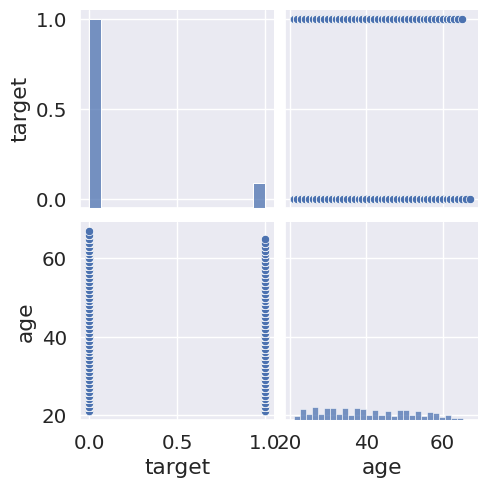

In [86]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.pairplot(num_df[['target', 'age']])


# Ваш код здесь

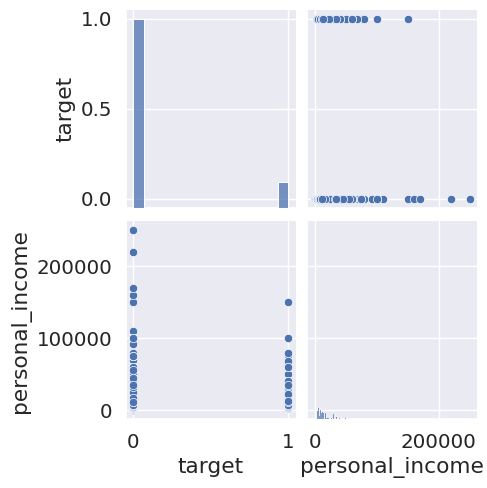

In [87]:
sns.pairplot(num_df[['target', 'personal_income']])

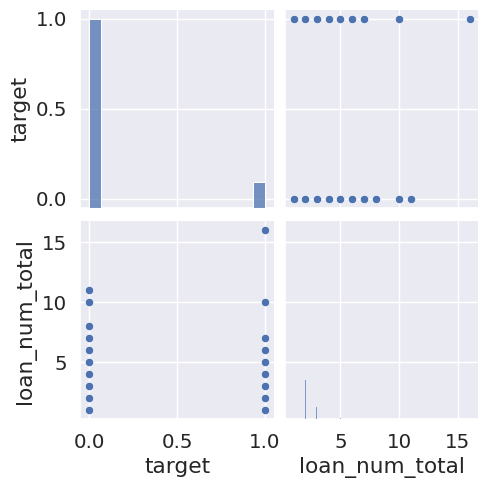

In [88]:
sns.pairplot(num_df[['target', 'loan_num_total']])

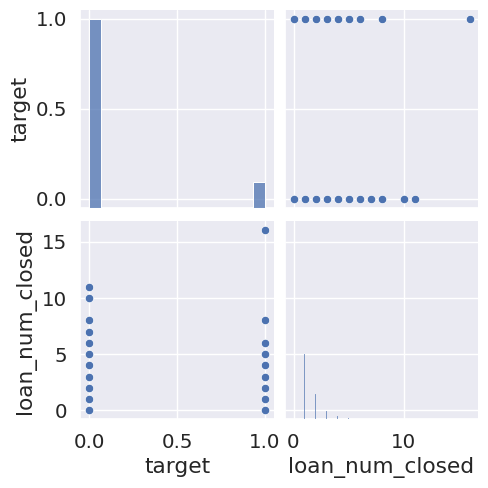

In [89]:
sns.pairplot(num_df[['target', 'loan_num_closed']])

#### Создание новых фичей

In [118]:
# Отношение закрытых кредитов к общему числу ссуд
df['closed_l/total_l'] = df['loan_num_closed'] / df['loan_num_total']

# Отношение дохода к общему числу ссуд
df['income/total_l'] = df['personal_income'] / df['loan_num_total']

In [119]:
df.head()

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed,closed_l/total_l,income/total_l
0,21,0,0,0,0,0,10000,63596287,0,1,0,0.0,10000.0
1,21,0,0,0,0,0,10000,64345856,0,1,0,0.0,10000.0
2,21,0,0,0,0,0,12000,62941277,0,2,1,0.5,6000.0
3,21,0,0,0,0,0,12000,64374643,0,1,1,1.0,12000.0
4,21,0,0,0,0,0,25000,64420984,0,1,0,0.0,25000.0


In [39]:
df.socstatus_work_fl.value_counts()

socstatus_work_fl
0    13847
1     1376
Name: count, dtype: int64

In [120]:
df.corr()

,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,agreement_rk,target,loan_num_total,loan_num_closed,closed_l/total_l,income/total_l
age,1.000000,0.142442,0.210014,-0.284973,0.453267,0.158508,-0.089942,-0.015864,-0.103868,0.022230,-0.001337,-0.037754,-0.086671
gender,0.142442,1.000000,0.049780,-0.081443,0.102309,-0.086044,-0.238123,0.051466,-0.030723,0.006511,0.010860,0.019587,-0.207534
child_total,0.210014,0.049780,1.000000,0.509516,0.041254,-0.004451,-0.053319,0.010149,0.011598,0.034798,0.005954,-0.034753,-0.057610
dependants,-0.284973,-0.081443,0.509516,1.000000,-0.201052,-0.060057,0.034964,0.021869,0.052170,0.052451,0.041556,0.008613,0.011442
socstatus_work_fl,0.453267,0.102309,0.041254,-0.201052,1.000000,-0.026522,-0.197759,0.026678,-0.078377,-0.033712,-0.041501,-0.032365,-0.160155
socstatus_pens_fl,0.158508,-0.086044,-0.004451,-0.060057,-0.026522,1.000000,0.033732,-0.007301,-0.009072,0.005277,0.011509,0.011869,0.025964
personal_income,-0.089942,-0.238123,-0.053319,0.034964,-0.197759,0.033732,1.000000,-0.033725,0.094575,-0.036164,-0.025424,-0.003518,0.902639
agreement_rk,-0.015864,0.051466,0.010149,0.021869,0.026678,-0.007301,-0.033725,1.000000,0.004391,0.310966,0.296631,0.184730,-0.156542
target,-0.103868,-0.030723,0.011598,0.052170,-0.078377,-0.009072,0.094575,0.004391,1.000000,-0.029557,-0.059947,-0.071332,0.096037
loan_num_total,0.022230,0.006511,0.034798,0.052451,-0.033712,0.005277,-0.036164,0.310966,-0.029557,1.000000,0.856063,0.365280,-0.372276


По графику 'target' - 'personal_income', видно что чаще откликаются люди с меньшим доходом. В других графиках не прослеживается четкая связь, но видно выброс, где у человека было 16 кредитов.
По матрице корреляций не выявлено сильной коррелиции между признаками и целевой переменной

#### Модель на несбалансированной выборке

In [121]:
# разделите на обучающую и тестовую выборки
x = df.drop(['target', 'agreement_rk'], axis=1)
y = df['target']

cat_columns = [
    'gender',
    'socstatus_work_fl',
    'socstatus_pens_fl',
]
x = pd.get_dummies(data=x, columns=cat_columns)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [122]:
for n in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)

    pred_train = knn.predict(x_train)
    pred_test = knn.predict(x_test)
    print(f"count neighborns {n}")
    f_res_train = f1_score(y_true=y_train, y_pred=pred_train, average='weighted')
    print(f"f-score train = {f_res_train}")
    f_res_test = f1_score(y_true=y_test, y_pred=pred_test, average='weighted')
    print(f"f-score test = {f_res_test}\n")

count neighborns 2
f-score train = 0.8577054788305328
f-score test = 0.8214357231845641

count neighborns 3
f-score train = 0.8748245588189688
f-score test = 0.819563036342173

count neighborns 4
f-score train = 0.8406333569901383
f-score test = 0.8206099613105344

count neighborns 5
f-score train = 0.8484427966659502
f-score test = 0.8234360953216194

count neighborns 6
f-score train = 0.8331155818771919
f-score test = 0.8204651893949743

count neighborns 7
f-score train = 0.8367471658565011
f-score test = 0.8219839355212649

count neighborns 8
f-score train = 0.8305625065819355
f-score test = 0.8210764279117757

count neighborns 9
f-score train = 0.8319656373741472
f-score test = 0.8204026383133863



Лучшая модель при n_neighbors=5

In [123]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [124]:
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

In [125]:
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.8866366366366366
0.8692796146266696


In [126]:
# проверьте качество модели с помощью F-мера
res = classification_report(y_true=y_train, y_pred=pred_train)
print(f"train {res}")
res_test = classification_report(y_true=y_test, y_pred=pred_test)
print(f"test {res_test}")

train               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9404
           1       0.61      0.10      0.17      1252

    accuracy                           0.89     10656
   macro avg       0.75      0.54      0.55     10656
weighted avg       0.86      0.89      0.85     10656

test               precision    recall  f1-score   support

           0       0.88      0.99      0.93      4007
           1       0.26      0.04      0.06       560

    accuracy                           0.87      4567
   macro avg       0.57      0.51      0.50      4567
weighted avg       0.80      0.87      0.82      4567



In [129]:
f_res = f1_score(y_true=y_train, y_pred=pred_train, average='weighted')
print(f_res)

0.8484427966659502


In [130]:
# проверьте качество модели с помощью матрицы сопряжённостей
print(confusion_matrix(y_true=y_train, y_pred=pred_train))
print(confusion_matrix(y_true=y_test, y_pred=pred_test))

[[9327   77]
 [1131  121]]
[[3950   57]
 [ 540   20]]


### Выводы
По матрице сопряженности видно, что на несбалансированной выборке модель хорошо предсказывает 0(нет отклика), но часто ошибается с предсказание 1(отклик), f-мера для 0 = 0.94, для 1 = 0.17

#### Модель на сбалансированной выборке

In [131]:
# сбалансировал датафрейм, так как на несбалансированном очень плохо предсказывалась 1
target_0 = df[df.target == 0]
target_1 = df[df.target == 1]

target_0_downsampled = resample(
    target_0,
    replace=False,
    n_samples=len(target_1),
    random_state=42,
)

down_df = pd.concat([target_0_downsampled, target_1])

In [132]:
# разделите на обучающую и тестовую выборки
x = down_df.drop(['target', 'agreement_rk'], axis=1)
y = down_df['target']

cat_columns = [
    'gender',
    'socstatus_work_fl',
    'socstatus_pens_fl',
]
x = pd.get_dummies(data=x, columns=cat_columns)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Ваш код здесь

KNeighborsClassifier()

In [137]:
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

In [138]:
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.7109621451104101
0.5340073529411765


In [139]:
# проверьте качество модели с помощью F-мера
res = classification_report(y_true=y_train, y_pred=pred_train)
print(f"train {res}")
res_test = classification_report(y_true=y_test, y_pred=pred_test)
print(f"test {res_test}")

train               precision    recall  f1-score   support

           0       0.71      0.70      0.70      1246
           1       0.71      0.72      0.72      1290

    accuracy                           0.71      2536
   macro avg       0.71      0.71      0.71      2536
weighted avg       0.71      0.71      0.71      2536

test               precision    recall  f1-score   support

           0       0.55      0.53      0.54       566
           1       0.51      0.53      0.52       522

    accuracy                           0.53      1088
   macro avg       0.53      0.53      0.53      1088
weighted avg       0.53      0.53      0.53      1088



In [140]:
f_res = f1_score(y_true=y_train, y_pred=pred_train, average='weighted')
print(f_res)

0.7109406982199081


In [141]:
# проверьте качество модели с помощью матрицы сопряжённостей
print(confusion_matrix(y_true=y_train, y_pred=pred_train))
print(confusion_matrix(y_true=y_test, y_pred=pred_test))

[[875 371]
 [362 928]]
[[302 264]
 [243 279]]


### Выводы на сбалансированной выборке
По матрице сопряженности видно, что на сбалансированной выборке модель стала лучше предсказывать 1(отклик), f-мера для 0 = 0.70, для 1 = 0.72

Общий вывод: модель лучше работает на сбалансированных выборках